In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spam_df = pd.read_csv("/content/drive/MyDrive/combined_data.csv")

In [ ]:
spam_df = pd.DataFrame(spam_df)

In [ ]:
spam_df.info

<bound method DataFrame.info of        label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
83443      0  hi given a date how do i get the last date of ...
83444      1  now you can order software on cd or download i...
83445      1  dear valued member canadianpharmacy provides a...
83446      0  subscribe change profile contact us long term ...
83447      1  get the most out of life ! viagra has helped m...

[83448 rows x 2 columns]>

In [ ]:
max_words = 1000
max_len = 20

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(spam_df['text'])
sequences = tokenizer.texts_to_sequences(spam_df['text'])
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
import pickle
pickle_out = open("tokenizer.pkl", "wb")
pickle.dump(tokenizer, pickle_out)
pickle_out.close()


In [ ]:
X = data
y = spam_df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pickle
pickle_out = open("scaler.pkl", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2087/2087 [==============================] - 97s 43ms/step - loss: 0.2014 - accuracy: 0.9204 - val_loss: 0.1584 - val_accuracy: 0.9394
Epoch 2/10
2087/2087 [==============================] - 88s 42ms/step - loss: 0.1557 - accuracy: 0.9402 - val_loss: 0.1476 - val_accuracy: 0.9421
Epoch 3/10
2087/2087 [==============================] - 88s 42ms/step - loss: 0.1435 - accuracy: 0.9449 - val_loss: 0.1439 - val_accuracy: 0.9434
Epoch 4/10
2087/2087 [==============================] - 88s 42ms/step - loss: 0.1351 - accuracy: 0.9478 - val_loss: 0.1414 - val_accuracy: 0.9455
Epoch 5/10
2087/2087 [==============================] - 87s 42ms/step - loss: 0.1279 - accuracy: 0.9507 - val_loss: 0.1407 - val_accuracy: 0.9470
Epoch 6/10
2087/2087 [==============================] - 89s 43ms/step - loss: 0.1215 - accuracy: 0.9536 - val_loss: 0.1428 - val_accuracy: 0.9469
Epoch 7/10
2087/2087 [==============================] - 88s 42ms/step - loss: 0.1159 - accuracy: 0.9554 - val_loss: 0.1437 -

In [ ]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

522/522 [==============================] - 3s 6ms/step
Test Accuracy: 0.9506


In [ ]:
!pip install scikeras

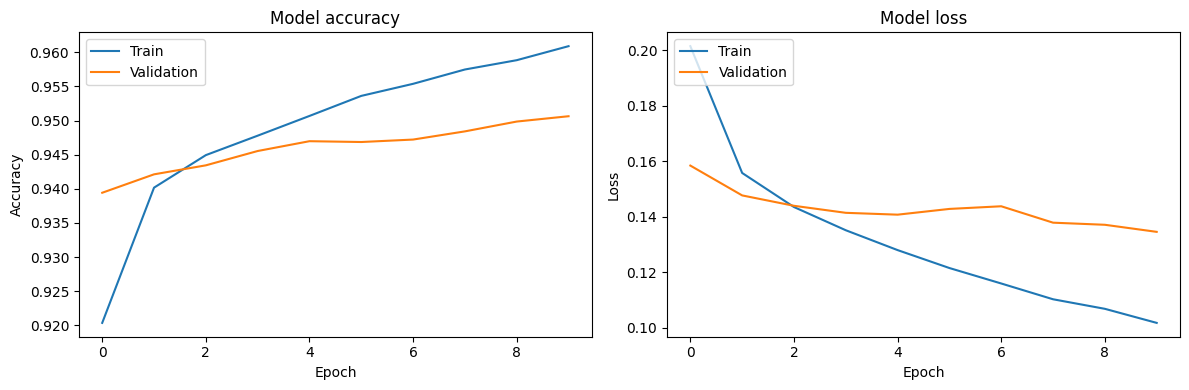

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
!pip install scikeras

In [ ]:
def create_model(units=64, dropout_rate=0.2, recurrent_dropout=0.2):
    model = Sequential()
    model.add(Embedding(max_words, 32, input_length=max_len))
    model.add(SpatialDropout1D(dropout_rate))
    model.add(LSTM(units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0, dropout_rate=0.2, recurrent_dropout=0.2, units=64)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS


text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)),
    ('clf_keras', model)  # Update the name
])

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'units': [32, 64],
    'dropout_rate': [0.2, 0.4]
}


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

grid_result = grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=32; total time= 4.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=32; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=32; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=64; total time= 4.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=64; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=64; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.4, units=32; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.4, units=32; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.4, units=32; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.4, units=64; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.4, units=64; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.4, units=64; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Best parameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_




y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy with Best Model: {accuracy:.4f}")

Best Parameters: {'dropout_rate': 0.2, 'units': 64}
Test Accuracy with Best Model: 0.9453


In [ ]:
best_model.fit(X_train, y_train, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KerasClassifier(
	model=None
	build_fn=<function create_model at 0x79934c68e9e0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	dropout_rate=0.2
	recurrent_dropout=0.2
	units=64
	class_weight=None
)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7938
           1       0.94      0.96      0.95      8752

    accuracy                           0.95     16690
   macro avg       0.95      0.94      0.95     16690
weighted avg       0.95      0.95      0.95     16690



In [ ]:
# Save the best model within the Colab environment
best_model.model_.save("finalmodel.h5")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


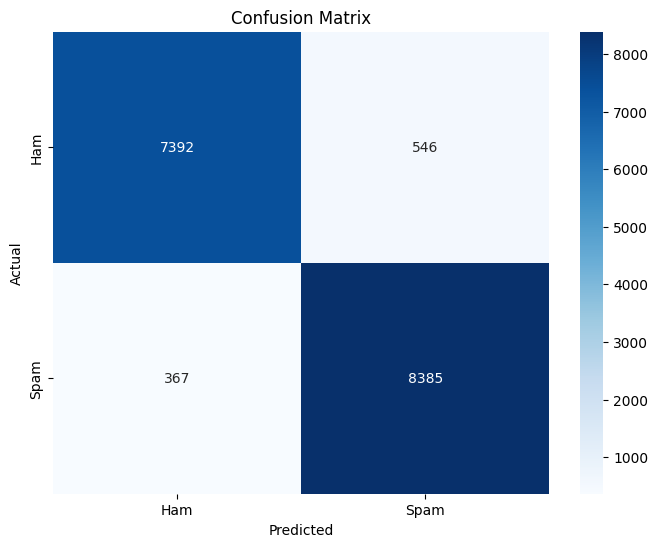

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
